# Classification of Subreddits

In [2]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier

# Import CountVectorizer and TFIDFVectorizer from feature_extraction.text.
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [3]:
# read in cleaned data
reddits = pd.read_csv('data/clean_reddits.csv')

In [3]:
reddits.head(2)

,author,created_utc,permalink,subreddit,text
0,dwaxe,1601660299,/r/TheOnion/comments/j3z3ds/real_estate_expert...,TheOnion,Real Estate Experts Confirm Having George Cloo...
1,kc9283,1601604158,/r/TheOnion/comments/j3m23g/subway_bread_isnt_...,TheOnion,"Subway bread isn't bread, Irish court says"


In [64]:
reddits.tail(2)

,author,created_utc,permalink,subreddit,text
29976,tamilidhal,1601267115,/r/news/comments/j15hsk/படடததரவகளல_பஙகறற_வலவயப...,news,போட்டித்தேர்வுகளில் பங்கேற்று வேலைவாய்ப்பு பெற...
29977,tamilidhal,1601267114,/r/news/comments/j15hs8/கரககல_அரச_மரததவமனயல_சம...,news,காரைக்கால் அரசு மருத்துவமனையில் சிமென்ட் காரை ...


In [65]:
reddits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29978 entries, 0 to 29977
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   author       29978 non-null  object
 1   created_utc  29978 non-null  int64 
 2   permalink    29978 non-null  object
 3   subreddit    29978 non-null  object
 4   text         29978 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.1+ MB


In [55]:
reddits.shape

(29978, 5)

In [4]:
# set X and y
X = reddits['text']

# binarize the target.
y = np.where(reddits['subreddit'] == 'TheOnion', 1, 0)

In [5]:
# train test split (no need to stratify, sample number are essentially the same for both subreddits)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 777)

### Calculating the baseline

In [6]:
y_test.sum() / len(y_test)

0.49966644429619744

##### As expected, the baseline would be 50% if guessed The Onion. It's essentially as good as a coin toss.

### Classification using CounterVectorizer and DecisionTreeClassifier

In [6]:
# instatiate CounterVectorizer
cvect = CountVectorizer(stop_words='english')

In [7]:
X_train_cvect = cvect.fit_transform(X_train, y_train)
X_test_cvect = cvect.transform(X_test)

### Classification using CounterVectorizer and RandomForestClassifier

In [8]:
# instantiate a random forest model
rfc = RandomForestClassifier()
rfc.fit(X_train_cvect, y_train)

RandomForestClassifier()

In [9]:
# score
print('train score:', rfc.score(X_train_cvect, y_train))
print('test_score:', rfc.score(X_test_cvect, y_test))

train score: 0.9997776097495886
test_score: 0.8695130086724483


In [17]:
# add scores to file
scores_df = pd.read_csv('data/model_scores.csv')
train_score = rfc.score(X_train_cvect, y_train)
test_score = rfc.score(X_test_cvect, y_test)
score_df = pd.DataFrame({'model': 'random_forest', 'train_accuracy': train_score, 'test_accuracy': test_score},  index=[0])
score_df = pd.concat([scores_df, score_df], ignore_index=True)
score_df.to_csv('data/model_scores.csv', index=False)

In [17]:
# cross validate
cross_val_score(rfc, X_train_cvect, y_train, cv=3)

array([0.85016678, 0.85188151, 0.83867094])

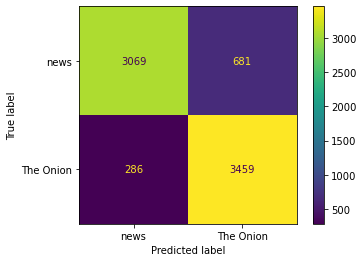

In [18]:
plot_confusion_matrix(rfc, X_test_cvect, y_test, display_labels=['news', 'The Onion']);

The score is better than a decision tree.